#3.1 Continuous-Time Systems: Convolution 

**3.1.1 Implementing Convolution Using Numerical Integration**

Task 1

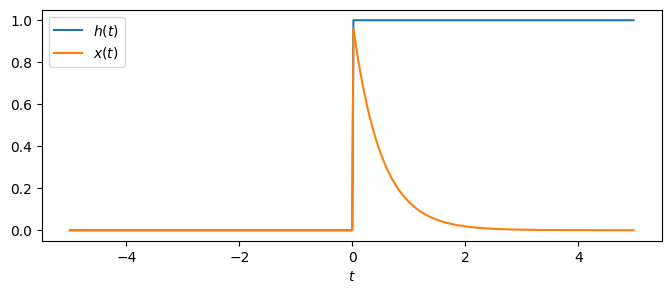

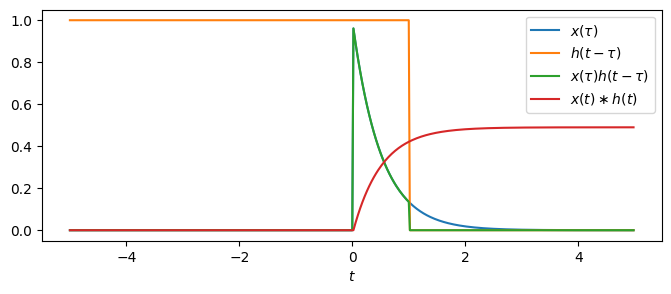

In [ ]:
from scipy import integrate
import numpy as np
import matplotlib.pyplot as plt
h = lambda t: (t > 0)*1.0
x = lambda t: (t > 0) * np.exp(-2*t) # a = 2
Fs = 50 # Sampling frequency for the plotting
T = 5 # Time range
t = np.arange(-T, T, 1/Fs) # Time samples
plt.figure(figsize=(8,3))
plt.plot(t, h(t), label='$h(t)$')
plt.plot(t, x(t), label='$x(t)$')
plt.xlabel(r'$t$')
plt.legend()
# Plotting
t_ = 1 # For illustration, choose some value for t
flipped = lambda tau: h(t_ - tau)
product = lambda tau: x(tau)*h(t_ - tau)
plt.figure(figsize=(8,3))
plt.plot(t, x(t), label=r'$x(\tau)$')
plt.plot(t, flipped(t), label=r'$h(t - \tau)$')
plt.plot(t, product(t), label=r'$x(\tau)h(t -\tau)$')
# Computing the convolution using integration
y = np.zeros(len(t))
for n, t_ in enumerate(t):
  product = lambda tau: x(tau) * h(t_ - tau)
  y[n] = integrate.simps(product(t), t) # Actual convolution at time t
plt.plot(t, y, label=r'$x(t)\ast h(t)$') # Plotting the output y
plt.xlabel(r'$t$')
plt.legend()


It is covolution integral of x(t) and h(t), as x(t) and h(t) are continuous time signals.

**3.1.2 Convolving with a Signal Composed of Impulse Functions**

Task 2

In [ ]:
fs = 1000 # Sampling frequency for the plotting
T = 5 # Time range
t = np.arange(-T, T, 1/fs) # Time samples
delta = lambda t: np.array([fs/10 if 0 < t_ and t_ < 1/(fs/10) else 0.0 for t_ in t])
Y = integrate.simps(delta(t), t) # Actual convolution at time t
print(Y)

1.000000000000334


Task 3

y(t) = integration of (x(k).h(t-k)) as k tends to minus infinity to plus infinity

Task 4

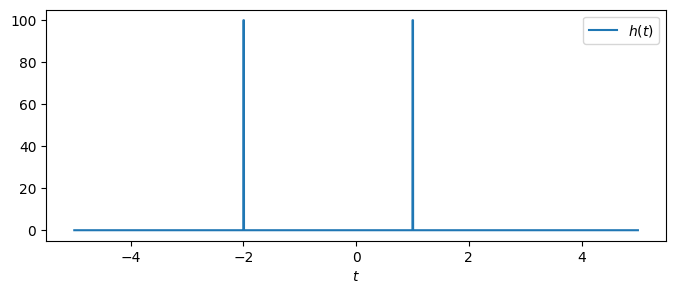

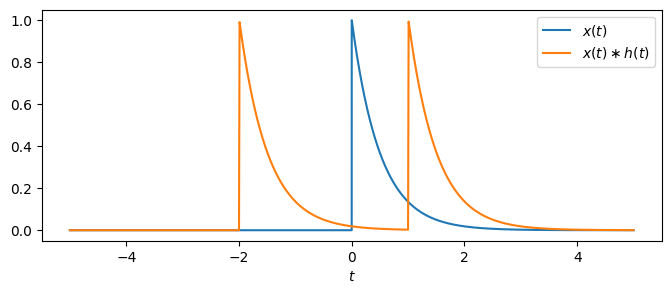

In [ ]:
h = lambda t: delta(t+2) + delta(t-1)
x = lambda t: (t > 0) * np.exp(-2*t) # a = 2

plt.figure(figsize=(8,3))
plt.plot(t, h(t), label='$h(t)$')
plt.xlabel(r'$t$')
plt.legend()

y = np.zeros(len(t))
for n, t_ in enumerate(t):
  product = lambda tau: x(tau) * h(t_ - tau)
  y[n] = integrate.simps(product(t), t) # Actual convolution at time t
plt.figure(figsize=(8,3))
plt.plot(t, x(t), label='$x(t)$')
plt.plot(t, y, label=r'$x(t)\ast h(t)$') # Plotting the output y
plt.xlabel(r'$t$')
plt.legend()

#3.2 Discrete-Time Systems: Convolution Sum

Task 5

y[0] = x[0:1]*h[6:7] = 0.0
y[1] = x[0:2]*h[5:7] = 0.0
y[2] = x[0:3]*h[4:7] = 0.0
y[3] = x[0:4]*h[3:7] = 0.0
y[4] = x[0:5]*h[2:7] = 3.0
y[5] = x[0:5]*h[1:6] = 4.0
y[6] = x[0:5]*h[0:5] = 7.0
y[7] = x[1:5]*h[0:4] = 2.0
y[8] = x[2:5]*h[0:3] = 0.0
y[9] = x[3:5]*h[0:2] = 0.0
y[10] = x[4:5]*h[0:1] = 0.0


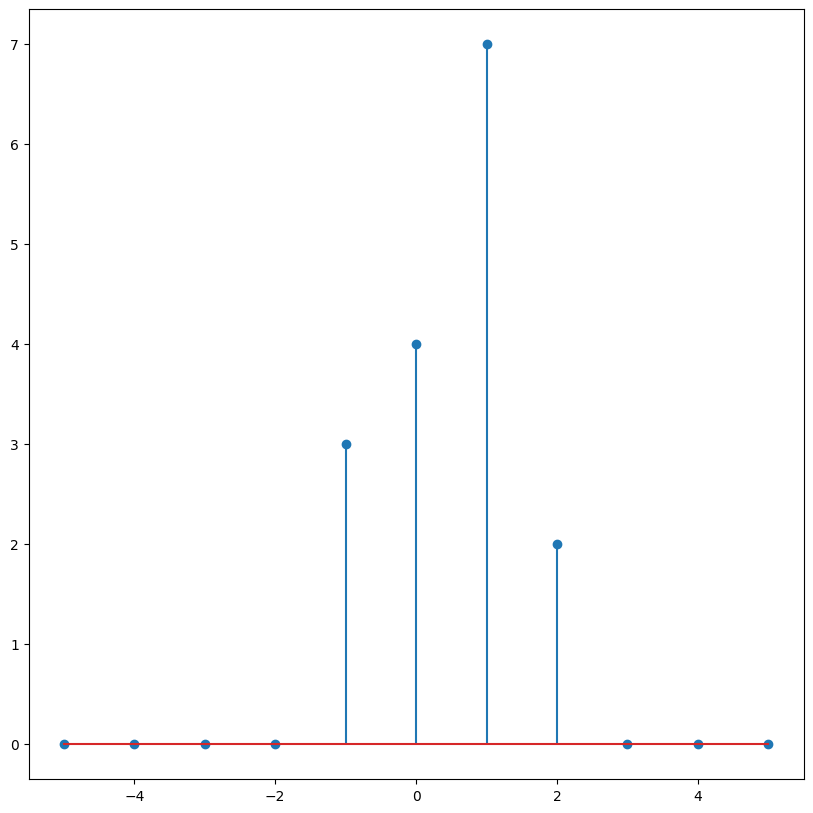

In [ ]:
x = np.array([0, 1, 1, 2, 0])
h = np.array([0, 0, 0, 3, 1, 0, 0])
hr = np.flip(h)
xo = 2
ho = 4
y = np.zeros(len(x) + len(h) - 1)
for n in range(len(y)):
  xkmin = max(0, n - len(h) + 1)
  xkmax = min(len(x), n + 1)
  hkmin = max(0, len(h) - n -1)
  hkmax = min(len(h), len(x) + len(h) -n -1)
  y[n] = np.sum(x[xkmin:xkmax]*hr[hkmin:hkmax])
  print("y[{0}] = x[{1}:{2}]*h[{3}:{4}] = {5}".format(n, xkmin, xkmax, hkmin, hkmax, y[n]))

N= np.arange(- len(h)+2 ,len(x)+1, 1)
fig, axes = plt.subplots(1,1, figsize=(10,10))
axes.stem(N,y)
plt.show()

Comment :-
It is the covolution sum of x(t) and h(t), as x(t) and h(t) are discrete time signals.

Task 6

y[0] = x[0:1]*h[6:7] = 0.0
y[1] = x[0:2]*h[5:7] = 0.0
y[2] = x[0:3]*h[4:7] = 0.0
y[3] = x[0:4]*h[3:7] = 0.0
y[4] = x[0:5]*h[2:7] = 3.0
y[5] = x[0:5]*h[1:6] = 4.0
y[6] = x[0:5]*h[0:5] = 7.0
y[7] = x[1:5]*h[0:4] = 2.0
y[8] = x[2:5]*h[0:3] = 0.0
y[9] = x[3:5]*h[0:2] = 0.0
y[10] = x[4:5]*h[0:1] = 0.0


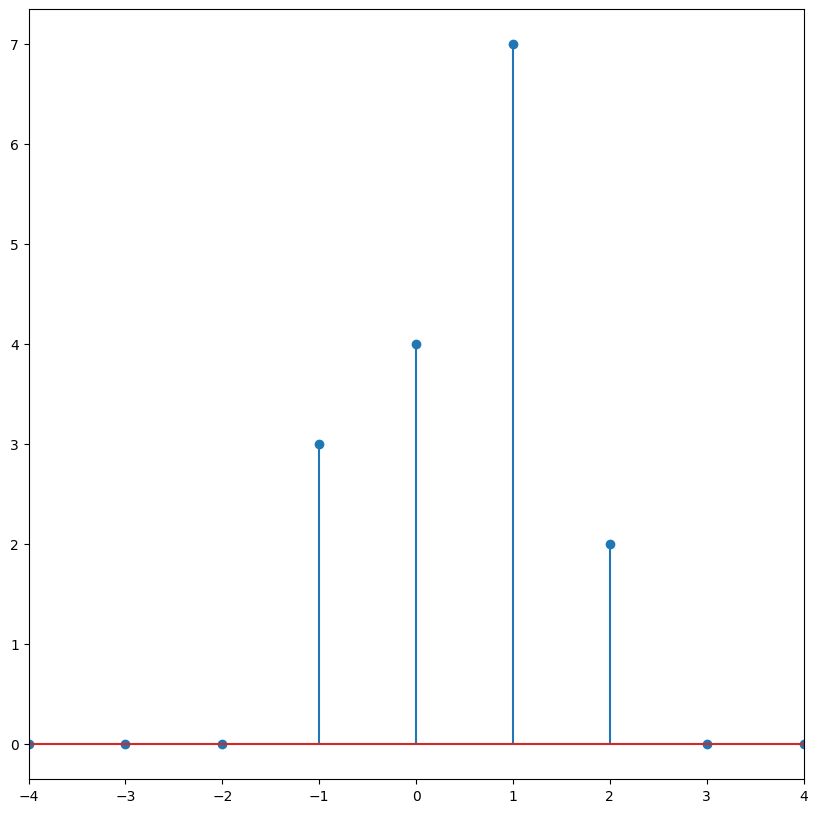

In [ ]:
for n in range(len(y)):
  xkmin = max(0, n - len(h) + 1)
  xkmax = min(len(x), n + 1)
  hkmin = max(0, len(h) - n -1)
  hkmax = min(len(h), len(x) + len(h) -n -1)
  y[n] = np.sum(x[xkmin:xkmax]*hr[hkmin:hkmax])
  print("y[{0}] = x[{1}:{2}]*h[{3}:{4}] = {5}".format(n, xkmin, xkmax, hkmin, hkmax, y[n]))

N= np.arange(- len(h)+2 ,len(x)+1, 1)
fig, axes = plt.subplots(1,1, figsize=(10,10))
axes.stem(N,y)
plt.xlim(-4,4)
plt.show()

Task 7

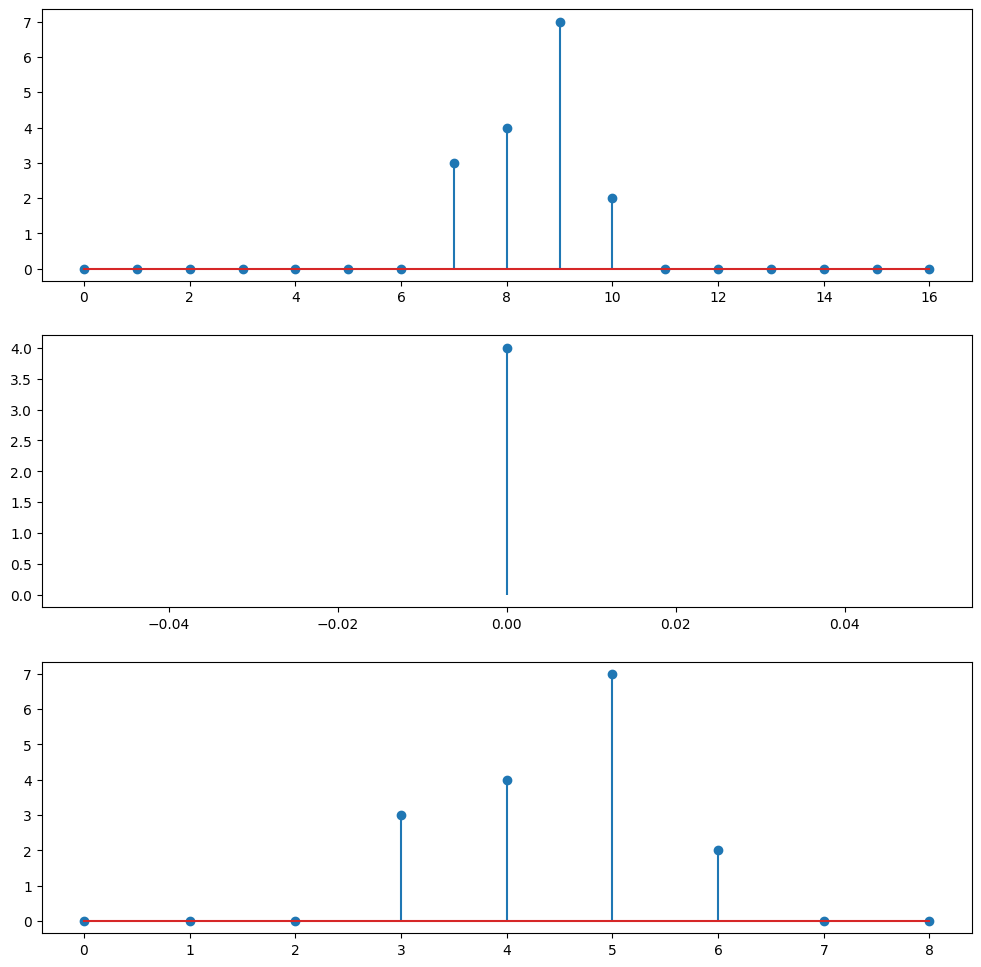

In [ ]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

x = np.array([0, 0, 0, 1, 1, 2, 0, 0, 0])
h = np.array([0, 0, 0, 0, 3, 1, 0, 0, 0])
N= np.arange(0,2*len(x)-1,1)
fig, ax = plt.subplots(3, 1, figsize=(12, 12))

y = signal.convolve(x, h, 'full')
ax[0].stem(y)

y = signal.convolve(x, h, 'valid')
ax[1].stem(y)

y = signal.convolve(x, h, 'same')
ax[2].stem(y)

plt.show()

**Mode**

full :- The output is the full discrete linear convolution of the inputs

valid :- when n=0, it means summation of x(k).h(-k) as k tends from minus infinity to plus infinity.

same : same as full mode, but has size of input signal.

#3.3 An Application in Audio Signal Filtering

Task 8

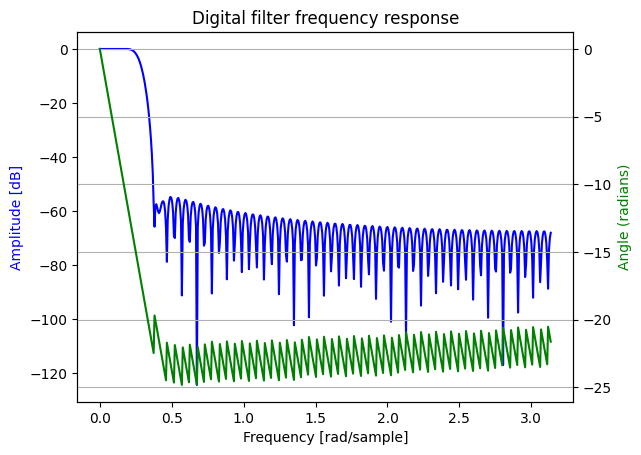

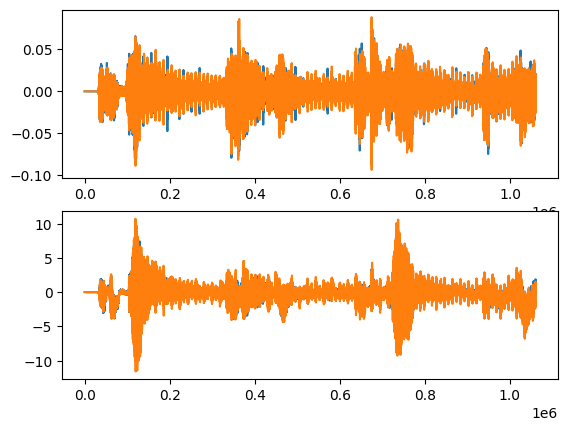

In [28]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
data, samplerate = sf.read('audio_file.wav')
nyquist = samplerate//2
fc = 2000/nyquist
n = 121
b = signal.firwin(n, fc, pass_zero=True)
w, h = signal.freqz(b)
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency response')
ax1.plot(w, 20 * np.log10(abs(h)), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [rad/sample]')
ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h))
ax2.plot(w, angles, 'g')
ax2.set_ylabel('Angle (radians)', color='g')
ax2.grid()
ax2.axis('tight')
plt.show()

# Your code here for convolution.
ch1 = []
ch2 = []
for j in range(len(data)):
    ch1.append(data[j][0])
    ch2.append(data[j][1])

y1 = signal.convolve(ch1, abs(w))
y2 = signal.convolve(ch2,abs(w))
fig, ax = plt.subplots(2, 1)
ax[0].plot(data)
ax[1].plot(y1)
ax[1].plot(y2)

sf.write('audio_file_filtered.wav', np.vstack((ch1, ch2)).T + data, samplerate)
plt.show()

Task 9

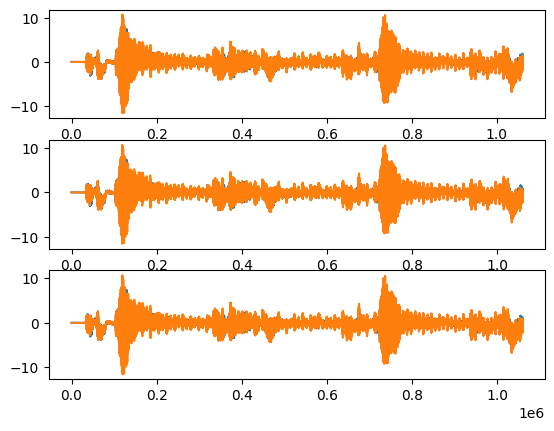

In [ ]:
fig, ax = plt.subplots(3, 1)
y1 = signal.convolve(ch1, abs(w), mode='full')
y2 = signal.convolve(ch2,abs(w), mode='full')
ax[0].plot(y1)
ax[0].plot(y2)

y1 = signal.convolve(ch1, abs(w), mode='valid')
y2 = signal.convolve(ch2,abs(w), mode='valid')
ax[1].plot(y1)
ax[1].plot(y2)

y1 = signal.convolve(ch1, abs(w), mode='same')
y2 = signal.convolve(ch2,abs(w), mode='same')
ax[2].plot(y1)
ax[2].plot(y2)
plt.show()

#3.4 Convolution Sum in 2-D

Task 10

In [ ]:
#Code
import scipy 
image = np.array([[0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0],
                  [0, 0, 1, 0, 0],
                  [0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0]])

filter = np.array([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]])

output = scipy.signal.convolve2d(image, filter)
print(output)

[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 1 2 3 0 0]
 [0 0 4 5 6 0 0]
 [0 0 7 8 9 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]


Task 11

1)Flip the filter array along both axes.

2)Place the center of the flipped filter on the first element of the image array.

3)Multiply each element of the flipped array with the corresponding element of the image array.

4)Add up all the products obtained in step 3.

5)Move the flipped filter to the next element of the image array and repeat steps 3 and 4 until all elements have been covered

#3.5 Application: Using Convolution to Filter an Image

Task 12

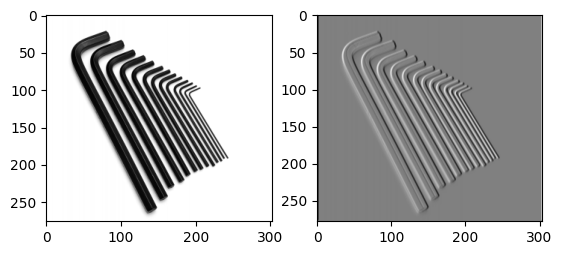

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
x = mpimg.imread('allenkeys.png')
fig, ax = plt.subplots(1,2)
ax[0].imshow(x, cmap='gray')

filter = np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])

filtered = scipy.signal.convolve2d(x, filter)
ax[1].imshow(filtered, cmap='gray')